## Visualize

* how neural networks learn?

In [1]:
import torch
import matplotlib.pyplot as plt
import sklearn.datasets

#### Generate Data

In [2]:
x,y = sklearn.datasets.make_moons(900, noise = 0.21)

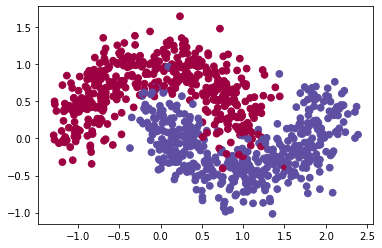

In [3]:
plt.scatter(x[:,0],x[:,1],s = 45,c = y, cmap = plt.cm.Spectral)
plt.show()

A non Linearly seperable approach!

#### Data Preprocessing

In [4]:
x = torch.FloatTensor(x)

# Usually labels are converted to Long Tensors
y = torch.LongTensor(y)

#### Model Creation

![title](img/model.png)

In [5]:
class FF(torch.nn.Module):
    
    ## here we model with only one hidden layer!
    def __init__(self,inputs,hidden_units,output):
        
        super(FF,self).__init__()
        
        self.hidden = torch.nn.Linear(inputs,hidden_units)
        self.out = torch.nn.Linear(hidden_units,output)
        
    def forward(self,x):
        x = self.hidden(x)
        x = torch.nn.functional.relu(x)
        x = self.out(x)
        return x

In [6]:
# Features
inputs = x.shape[1]
output = 2
net = FF(inputs = inputs, hidden_units = 64, output = output)

#### Optimizer and learning

In [7]:
optimizer = torch.optim.SGD(params = net.parameters(), lr = 0.01)
loss_fn = torch.nn.CrossEntropyLoss()

#### Traning and Visualize process

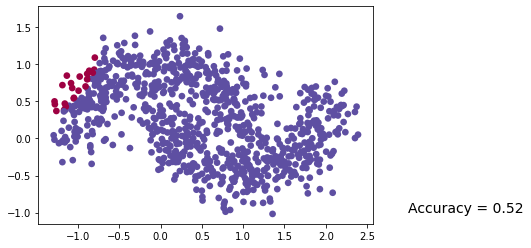

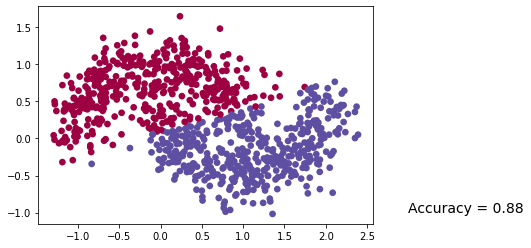

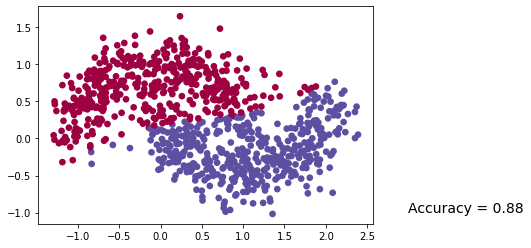

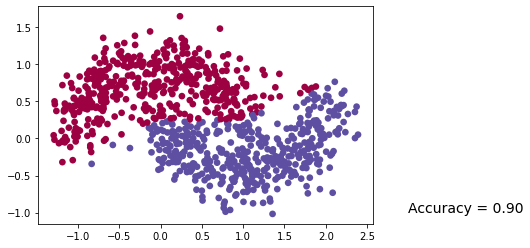

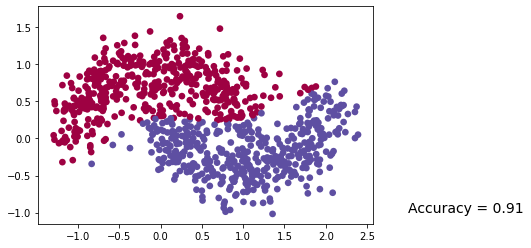

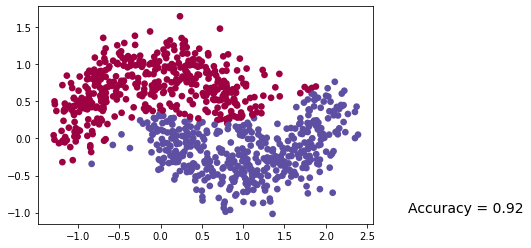

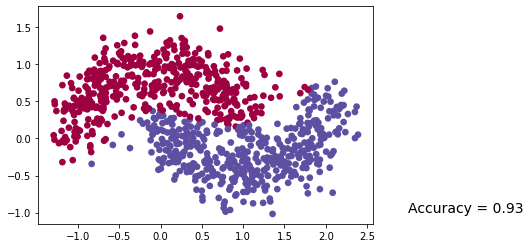

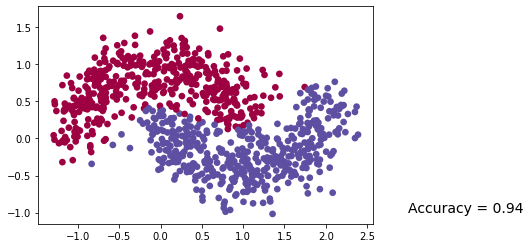

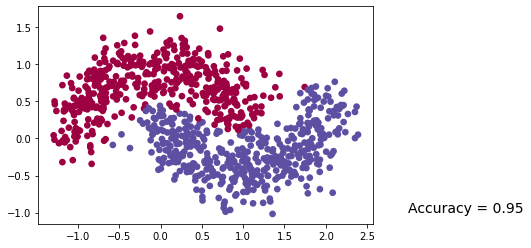

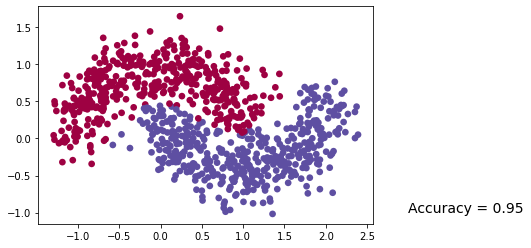

In [8]:
plt.ion()
epochs = 10000
for epoch in range(epochs):
    out = net.forward(x)
    loss = loss_fn(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # For every 10 times, pass out through updated weights network 
    #for prediction and visualize new learnings
    if epoch % 1000 == 0:
        
        #show learning process
        _,prediction = torch.max(out,1)
        
        #matplotlib takes on ly numpy not tensors
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],s = 45, c = pred_y, cmap = plt.cm.Spectral, lw = 0)
        accuracy = (pred_y == target_y).mean()
        plt.text(3,-1,'Accuracy = {:.2f}'.format(accuracy),fontdict = {'size':14})
        plt.pause(0.2)
plt.ioff()
plt.show()